In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from dateutil.easter import easter
from dateutil.relativedelta import relativedelta as rd
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.layers import Dense, Dropout
from keras.models import Sequential
from matplotlib import style
import sklearn
import scipy as sp
import matplotlib.pyplot as plt
import time
import pylab
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import (GridSearchCV,train_test_split, cross_val_predict, cross_val_score, 
                                     KFold, StratifiedKFold, ShuffleSplit,learning_curve,
                                     RandomizedSearchCV, RepeatedStratifiedKFold)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame
from pandas import concat
import numpy as np
from math import sqrt
from  scipy.stats import skew, kurtosis, shapiro
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
import sklearn.metrics as metrics
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox
from matplotlib.pylab import rcParams
import seaborn as sns
from sklearn.metrics import mean_squared_error
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
import numpy as np
import matplotlib.pyplot as plt
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

In [ ]:
# import and read the given data set
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/new EV data1.csv", parse_dates=['End_Date_Time', 'Start_Date_Time'])
data = data[['End_Date_Time', 'Energy_kWh']]
data

,End_Date_Time,Energy_kWh
0,2018-01-20,4.608
1,2018-01-20,8.786
2,2018-01-20,4.940
3,2018-01-20,0.000
4,2018-01-20,3.023
...,...,...
43654,2022-07-31,2.401
43655,2022-07-31,6.587
43656,2022-07-31,7.130
43657,2022-07-31,11.828


In [ ]:
data_Daily=data.groupby(pd.Grouper(key='End_Date_Time', axis=0, freq='D', sort=True)).sum()
data_Daily.reset_index(level=0, inplace=True)
data_Daily

,End_Date_Time,Energy_kWh
0,2018-01-01,6.504
1,2018-01-02,2.481
2,2018-01-03,26.273
3,2018-01-04,28.561
4,2018-01-05,19.700
...,...,...
1670,2022-07-29,414.485
1671,2022-07-30,620.827
1672,2022-07-31,524.084
1673,2022-08-01,14.048


In [ ]:
index = data_Daily.index
number_of__total_rows = len(index)
C1 = (data_Daily['Energy_kWh'] == 0).sum()
print('Count of missing values as per Daily based  : ', C1)
Actual_data = number_of__total_rows-C1
print('Count of actually data as per Daily based:',Actual_data)
Percentage_Missing_data=(C1/number_of__total_rows)*100
print("Percentage of missing data as per daily based :",Percentage_Missing_data)
Percentage_Available_data=(Actual_data/number_of__total_rows)*100
print("Percentage of Available data as per daily based :",Percentage_Available_data)
data_Daily.describe()

Count of missing values as per Daily based  :  4
Count of actually data as per Daily based: 1671
Percentage of missing data as per daily based : 0.23880597014925373
Percentage of Available data as per daily based : 99.76119402985074


,Energy_kWh
count,1675.000000
mean,211.730786
std,132.056048
min,0.000000
25%,106.881500
50%,188.455000
75%,292.529500
max,751.403000


In [ ]:
data_Weekly=data.groupby(pd.Grouper(key='End_Date_Time', axis=0, freq='w', sort=True)).sum()
data_Weekly.reset_index(level=0, inplace=True)
data_Weekly

,End_Date_Time,Energy_kWh
0,2018-01-07,146.851
1,2018-01-14,271.510
2,2018-01-21,250.776
3,2018-01-28,472.116
4,2018-02-04,438.784
...,...,...
235,2022-07-10,3139.773
236,2022-07-17,3819.764
237,2022-07-24,3497.178
238,2022-07-31,3543.541


In [ ]:
index = data_Weekly. index
number_of__total_rows = len(index)
C1 = (data_Weekly['Energy_kWh'] == 0).sum()
print('Count of missing values as per Weekly based  : ', C1)
Actual_data = number_of__total_rows-C1
print('Count of actually data as per Weekly based :',Actual_data)
Percentage_Missing_data=(C1/number_of__total_rows)*100
print("Percentage of missing data as per weekly based :",Percentage_Missing_data)
Percentage_Available_data=(Actual_data/number_of__total_rows)*100
print("Percentage of Available data as per weekly based :",Percentage_Available_data)
data_Weekly.describe()

Count of missing values as per Weekly based  :  0
Count of actually data as per Weekly based : 240
Percentage of missing data as per weekly based : 0.0
Percentage of Available data as per weekly based : 100.0


,Energy_kWh
count,240.000000
mean,1477.704446
std,828.684258
min,29.785000
25%,830.074250
50%,1401.947500
75%,1998.850750
max,4051.983000


In [ ]:
data_Daily.reset_index(level=0, inplace=True)
data_Daily['Date'] = pd.to_datetime(data_Daily['End_Date_Time']).dt.date
data_Daily.drop(data_Daily.columns[[0]], axis = 1, inplace = True)
first_column = data_Daily.pop('Date')
data_Daily.insert(0, 'Date', first_column)
data_Daily['Date'] = pd.to_datetime(data_Daily['Date'])
data_Daily.drop(data_Daily.columns[[1]], axis = 1, inplace = True)
data_Daily

,Date,Energy_kWh
0,2018-01-01,6.504
1,2018-01-02,2.481
2,2018-01-03,26.273
3,2018-01-04,28.561
4,2018-01-05,19.700
...,...,...
1670,2022-07-29,414.485
1671,2022-07-30,620.827
1672,2022-07-31,524.084
1673,2022-08-01,14.048


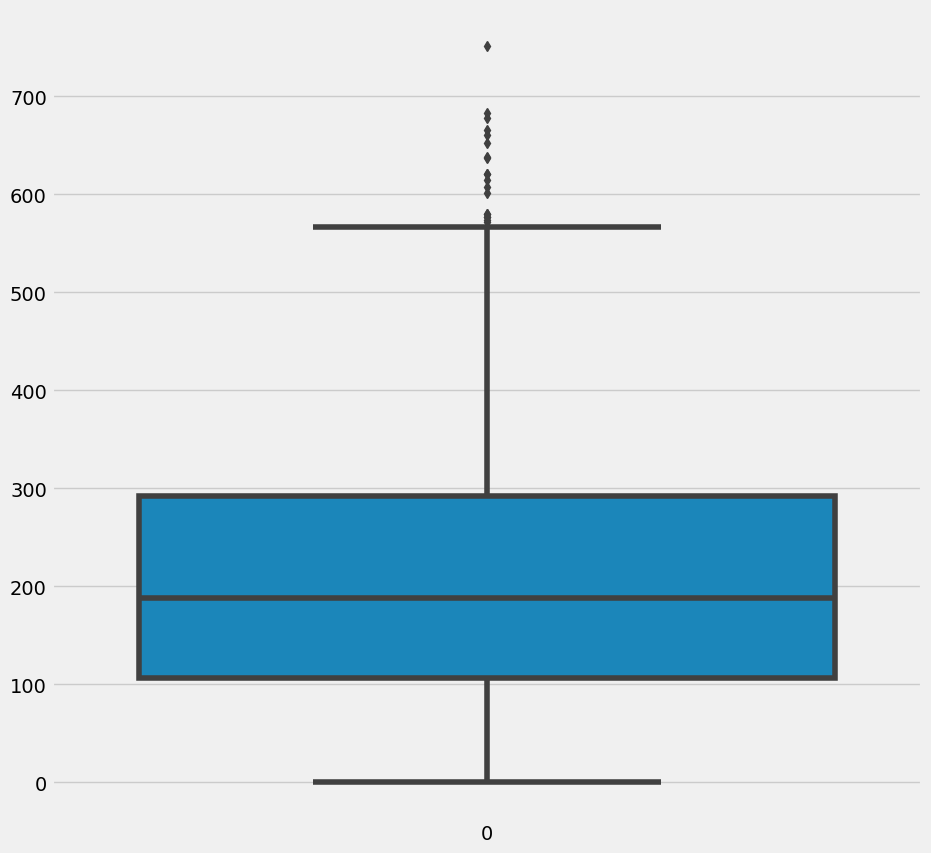

In [ ]:
data_Daily=data_Daily.groupby(pd.Grouper(key='Date', axis=0, freq='D', sort=True)).sum()
plt.figure(figsize=(10,10))
sns.boxplot(data=data_Daily['Energy_kWh'])  # Box plot is a data visualization technique in the seaborn library. Its is used to detect the outliers.
xt=plt.xticks(rotation=0)

In [ ]:
data_Daily.drop(data_Daily[data_Daily['Energy_kWh'] > 560].index, inplace = True)
data_Daily

,Energy_kWh
Date,
2018-01-01,6.504
2018-01-02,2.481
2018-01-03,26.273
2018-01-04,28.561
2018-01-05,19.700
...,...
2022-07-28,377.519
2022-07-29,414.485
2022-07-31,524.084


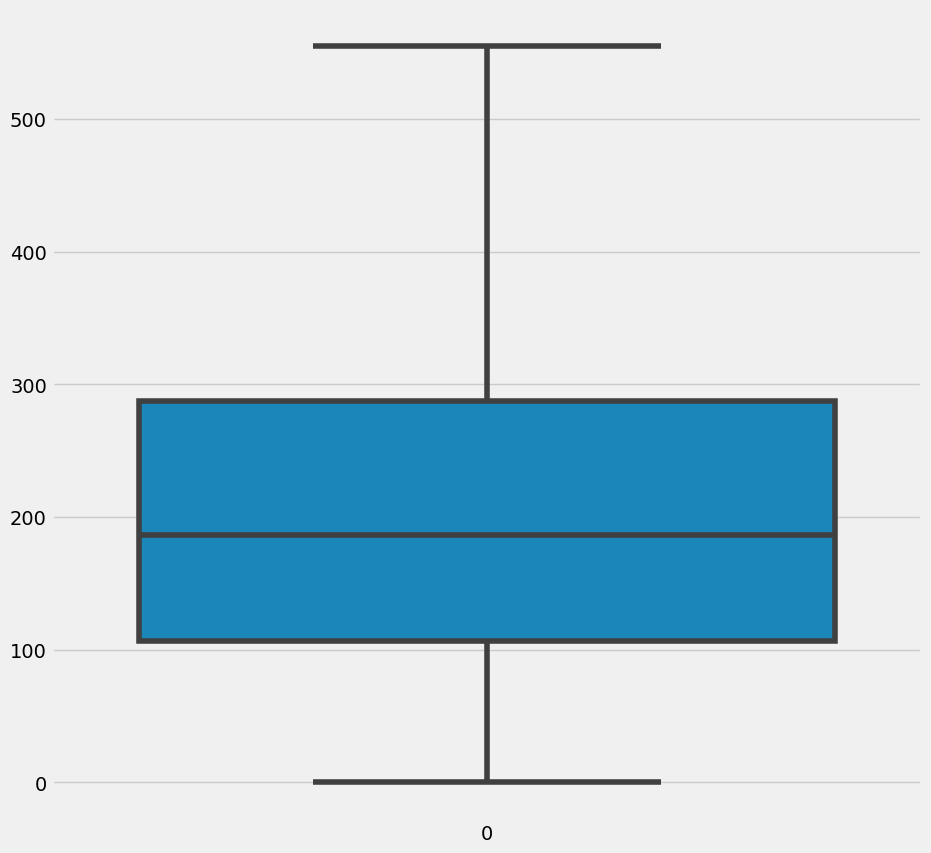

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data_Daily['Energy_kWh']) 
# Box plot is a data visualization technique in the seaborn library. Its is used to detect the outliers.
xt=plt.xticks(rotation=0)

In [ ]:
data_Daily.reset_index(level=0, inplace=True)
data_Daily=data_Daily.groupby(pd.Grouper(key='Date', axis=0, freq='D', sort=True)).sum()
data_Daily

,Energy_kWh
Date,
2018-01-01,6.504
2018-01-02,2.481
2018-01-03,26.273
2018-01-04,28.561
2018-01-05,19.700
...,...
2022-07-29,414.485
2022-07-30,0.000
2022-07-31,524.084


In [ ]:
data_Daily.loc[data_Daily['Energy_kWh'] == 0,'Energy_kWh'] = np.nan
# checking null values
data_Daily.isna().sum()

Energy_kWh    30
dtype: int64

In [ ]:
data_Daily = data_Daily.interpolate(method="linear",order=1)
data_Daily

,Energy_kWh
Date,
2018-01-01,6.5040
2018-01-02,2.4810
2018-01-03,26.2730
2018-01-04,28.5610
2018-01-05,19.7000
...,...
2022-07-29,414.4850
2022-07-30,469.2845
2022-07-31,524.0840


In [ ]:
# checking null values
data_Daily.isna().sum()

Energy_kWh    0
dtype: int64

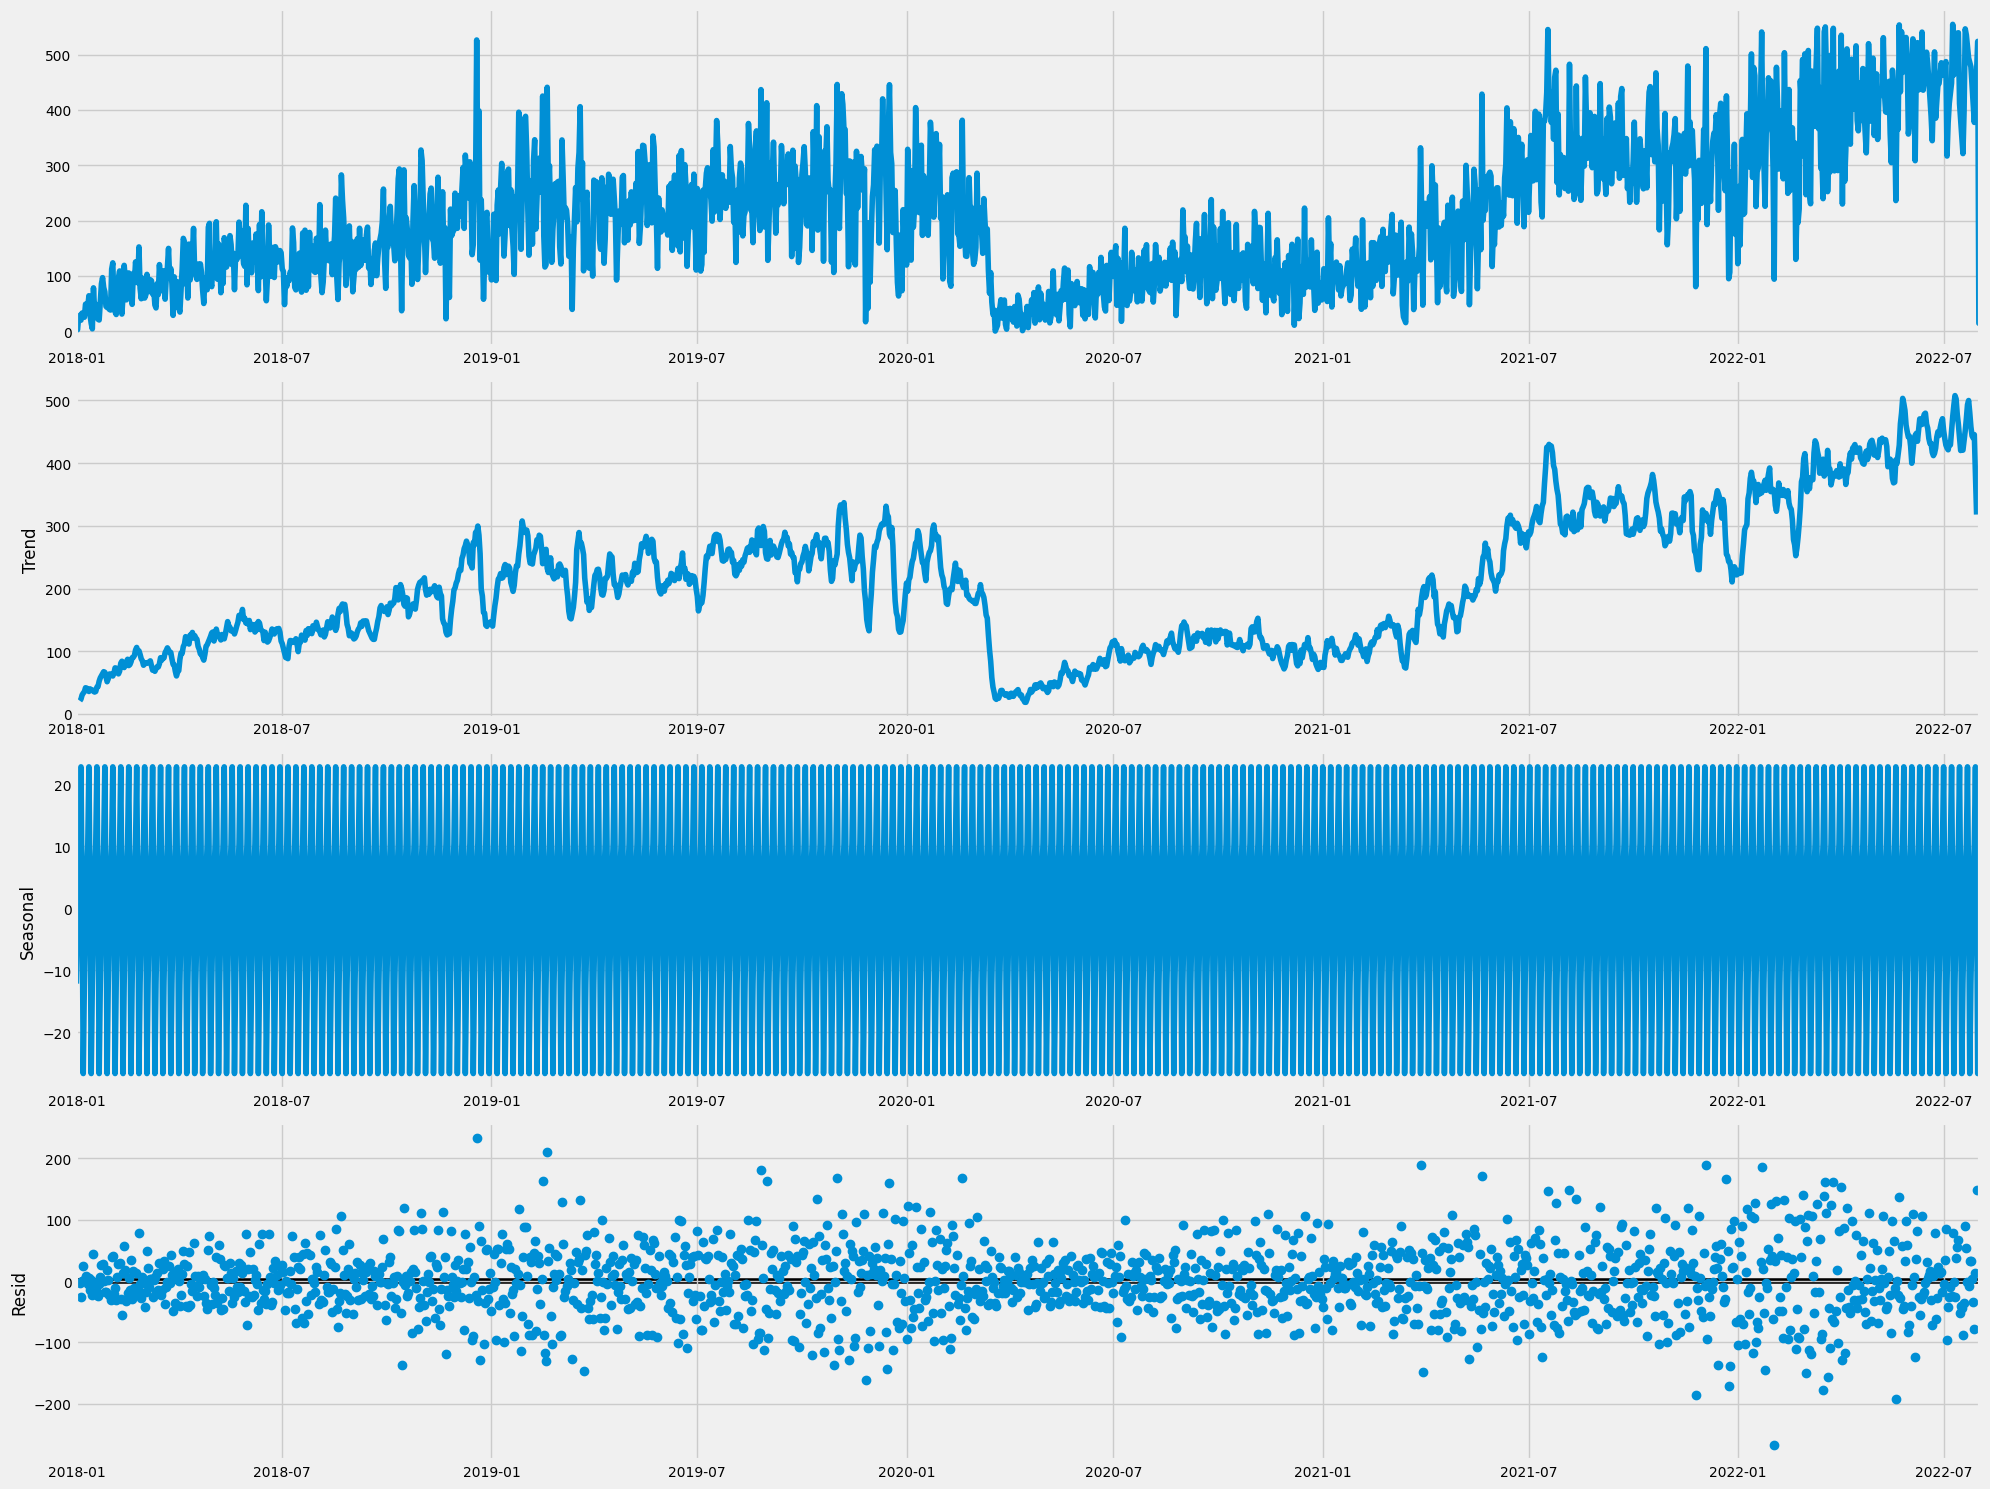

In [ ]:
plt.rcParams["figure.figsize"] = (20, 15)
plt.rcParams.update({'font.size': 10})
decomposition = sm.tsa.seasonal_decompose(data_Daily, model='additive') 
fig = decomposition.plot()

In [ ]:
def adfuller_test(ts, window = 12):
    
    adf = adfuller(ts, autolag='AIC')
    
    print('ADF Statistic: {}'.format(round(adf[0],3)))
    print('p-value: {}'.format(round(adf[1],3)))
    print("##################################")  
    print('Critical Values:')
    
    for key, ts in adf[4].items():
         print('{}: {}'.format(key, round(ts,3)))
    print("##################################")
    
    if adf[0] > adf[4]["5%"]:
        print("ADF > Critical Values")
        print ("Failed to reject null hypothesis, time series is non-stationary.")
    else:
        print("ADF < Critical Values")
        print ("Reject null hypothesis, time series is stationary.")
        
adfuller_test(data_Daily['Energy_kWh'], window = 12)

ADF Statistic: -1.904
p-value: 0.33
##################################
Critical Values:
1%: -3.434
5%: -2.863
10%: -2.568
##################################
ADF > Critical Values
Failed to reject null hypothesis, time series is non-stationary.


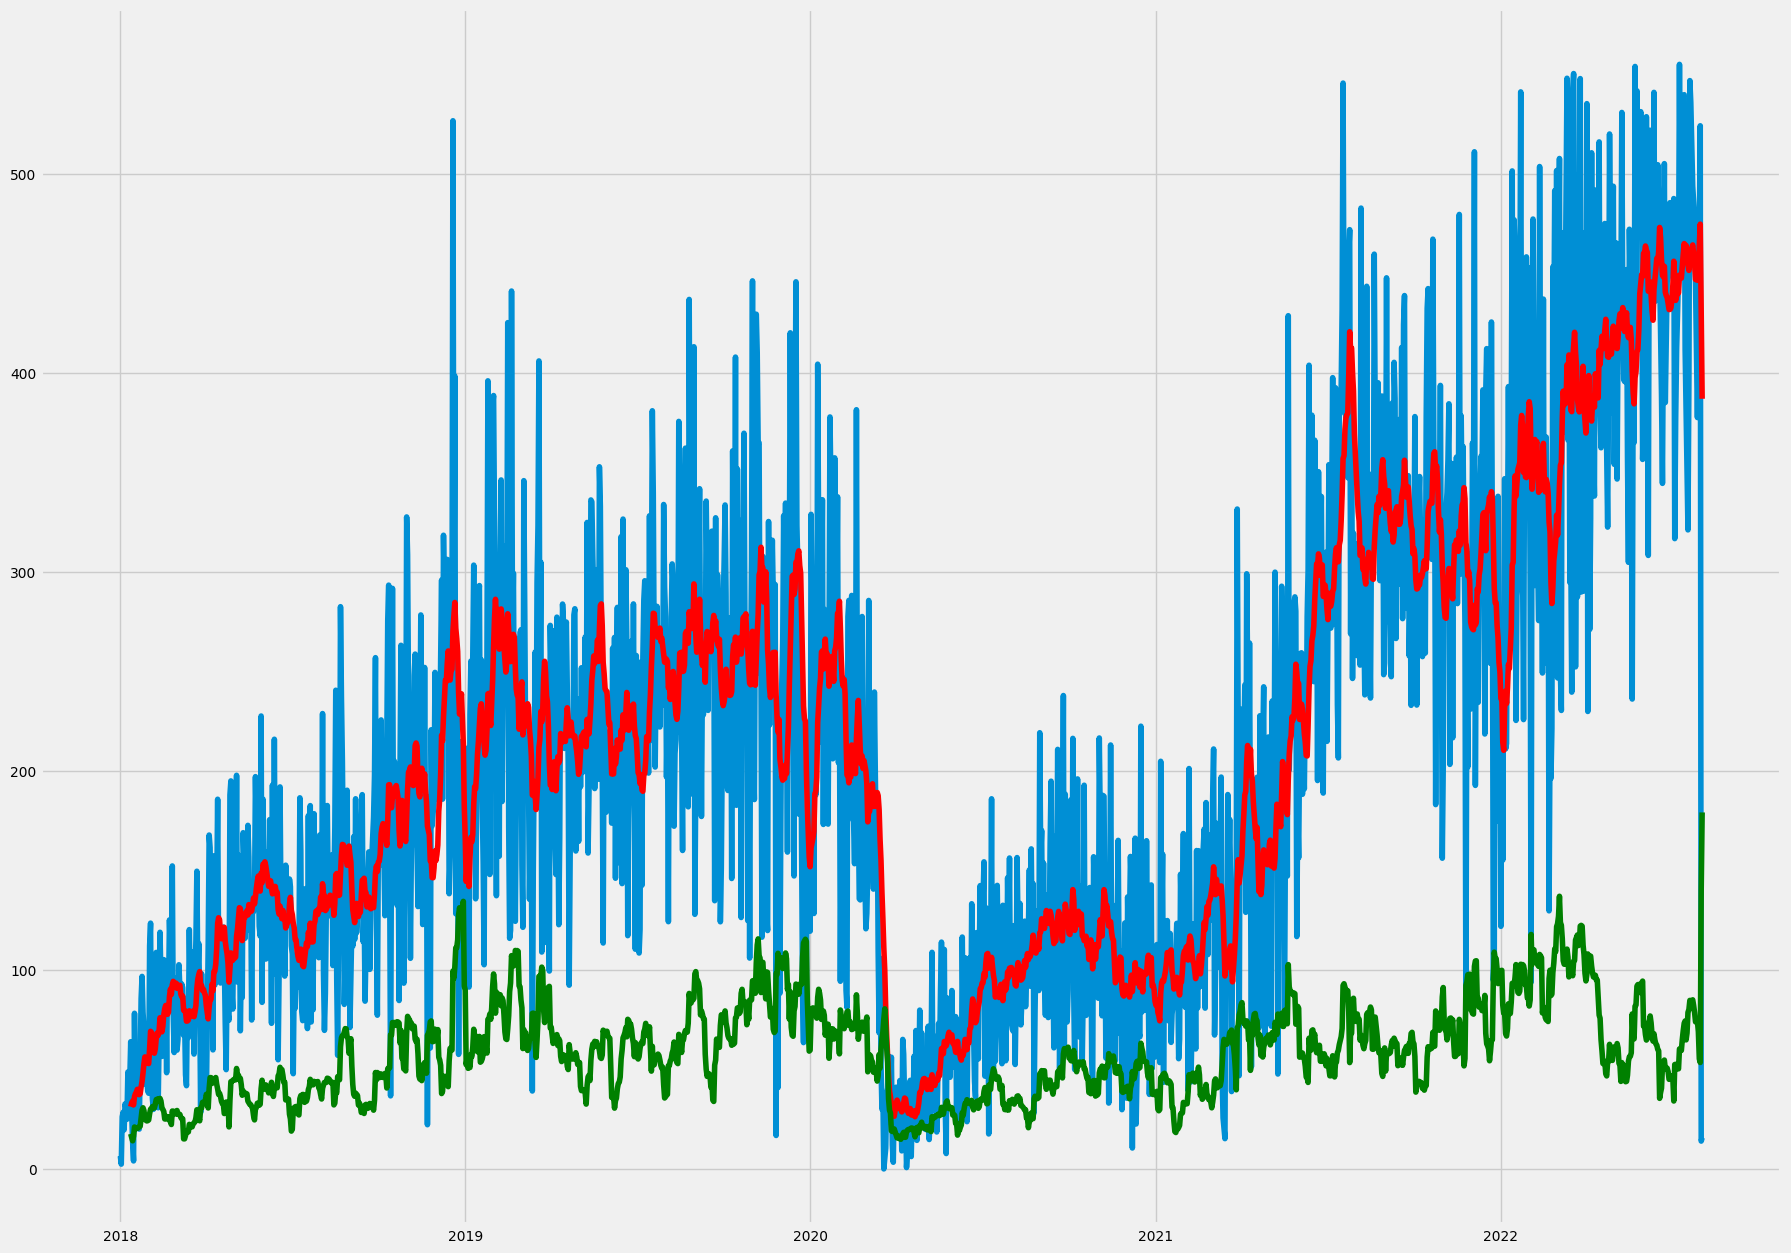

In [ ]:
movingAverage = data_Daily['Energy_kWh'].rolling(window=12).mean()
movingSTD = data_Daily['Energy_kWh'].rolling(window=12).std()
plt.plot(data_Daily['Energy_kWh'])
plt.plot(movingAverage, color='red')
plt.plot(movingSTD, color='green')

In [ ]:
movingAverage

Date
2018-01-01           NaN
2018-01-02           NaN
2018-01-03           NaN
2018-01-04           NaN
2018-01-05           NaN
                 ...    
2022-07-29    451.738542
2022-07-30    464.088500
2022-07-31    474.670250
2022-08-01    430.275917
2022-08-02    386.943417
Freq: D, Name: Energy_kWh, Length: 1675, dtype: float64

In [ ]:
dataset_MinusMovingAverage =data_Daily['Energy_kWh'] - movingAverage

In [ ]:
#Remove NAN valuesdata_Daily
dataset_MinusMovingAverage.dropna(inplace=True)
dataset_MinusMovingAverage

Date
2018-01-12     32.621417
2018-01-13     -4.647583
2018-01-14    -20.316667
2018-01-15    -28.167833
2018-01-16     41.848833
                 ...    
2022-07-29    -37.253542
2022-07-30      5.196000
2022-07-31     49.413750
2022-08-01   -416.227917
2022-08-02   -371.206417
Freq: D, Name: Energy_kWh, Length: 1664, dtype: float64

In [ ]:
adfuller_test(dataset_MinusMovingAverage)

ADF Statistic: -11.918
p-value: 0.0
##################################
Critical Values:
1%: -3.434
5%: -2.863
10%: -2.568
##################################
ADF < Critical Values
Reject null hypothesis, time series is stationary.


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#building the model
from pmdarima.arima import auto_arima
model_auto_arima_s = auto_arima(dataset_MinusMovingAverage, trace=True,seasonal = True, error_action='ignore', suppress_warnings=True,approximation = False, stepwise = False)
model_auto_arima_s.fit(dataset_MinusMovingAverage)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=18571.873, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=18494.006, Time=0.60 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=18482.597, Time=1.57 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=18479.964, Time=2.70 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=18481.927, Time=5.49 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=18478.360, Time=4.72 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=18485.944, Time=0.41 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=18487.846, Time=0.87 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=18480.482, Time=2.77 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=18456.391, Time=7.04 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=18458.354, Time=13.70 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=18487.770, Time=0.93 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=18485.675, Time=7.58 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=18446.508, Time=6.18 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=7.19 sec


ARIMA(order=(2, 0, 2), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [ ]:
import datetime
predictions = model_auto_arima_s.predict(n_periods=len(dataset_MinusMovingAverage))
df = pd.DataFrame(predictions, columns = ['Predicted'])
df.reset_index(inplace=True)
df.rename(columns={'index':'Date'}, inplace=True)
df['Date'] = df['Date'] - datetime.timedelta(days=1664)
df

,Date,Predicted
0,2018-01-12,-0.484815
1,2018-01-13,24.921157
2,2018-01-14,31.904333
3,2018-01-15,15.289377
4,2018-01-16,-12.319382
...,...,...
1659,2022-07-29,1.387043
1660,2022-07-30,1.382545
1661,2022-07-31,0.777379
1662,2022-08-01,0.029516


In [ ]:
movingAverage = movingAverage.iloc[11:]
mdf = pd.DataFrame(movingAverage, columns=['Energy_kWh'])
mdf.reset_index(inplace=True)
mdf

,Date,Energy_kWh
0,2018-01-12,31.336583
1,2018-01-13,33.171583
2,2018-01-14,34.114667
3,2018-01-15,32.266833
4,2018-01-16,36.408167
...,...,...
1659,2022-07-29,451.738542
1660,2022-07-30,464.088500
1661,2022-07-31,474.670250
1662,2022-08-01,430.275917


In [ ]:
result = pd.merge(movingAverage, df, on='Date')
result

,Date,Energy_kWh,Predicted
0,2018-01-12,31.336583,-0.484815
1,2018-01-13,33.171583,24.921157
2,2018-01-14,34.114667,31.904333
3,2018-01-15,32.266833,15.289377
4,2018-01-16,36.408167,-12.319382
...,...,...,...
1659,2022-07-29,451.738542,1.387043
1660,2022-07-30,464.088500,1.382545
1661,2022-07-31,474.670250,0.777379
1662,2022-08-01,430.275917,0.029516


In [ ]:
result=result.groupby(pd.Grouper(key='Date', axis=0, freq='D', sort=True)).sum()
result['Predicted_orginal'] = result.sum(axis=1)
result

,Energy_kWh,Predicted,Predicted_orginal
Date,,,
2018-01-12,31.336583,-0.484815,30.851768
2018-01-13,33.171583,24.921157,58.092740
2018-01-14,34.114667,31.904333,66.019000
2018-01-15,32.266833,15.289377,47.556210
2018-01-16,36.408167,-12.319382,24.088785
...,...,...,...
2022-07-29,451.738542,1.387043,453.125585
2022-07-30,464.088500,1.382545,465.471045
2022-07-31,474.670250,0.777379,475.447629


In [ ]:
data_Daily_1 = data_Daily.iloc[11:]
result_arima = pd.merge(data_Daily_1, result, left_index=True, right_index=True)
result_arima=result_arima.drop(['Energy_kWh_y','Predicted'], axis = 1)
result_arima

,Energy_kWh_x,Predicted_orginal
Date,,
2018-01-12,63.9580,30.851768
2018-01-13,28.5240,58.092740
2018-01-14,13.7980,66.019000
2018-01-15,4.0990,47.556210
2018-01-16,78.2570,24.088785
...,...,...
2022-07-29,414.4850,453.125585
2022-07-30,469.2845,465.471045
2022-07-31,524.0840,475.447629


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(result_arima["Energy_kWh_x"],result_arima["Predicted_orginal"]))
print('Mean Absolute Error:', mean_absolute_error(result_arima["Energy_kWh_x"],result_arima["Predicted_orginal"]))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(result_arima["Energy_kWh_x"],result_arima["Predicted_orginal"])))

Mean Absolute Percentage Error: 1.2747848060137803
Mean Absolute Error: 50.20976474637455
Root Mean Squared Error: 65.88199504311976


Text(0.5, 1.0, 'Arima results (Actual vs Predicted) ')

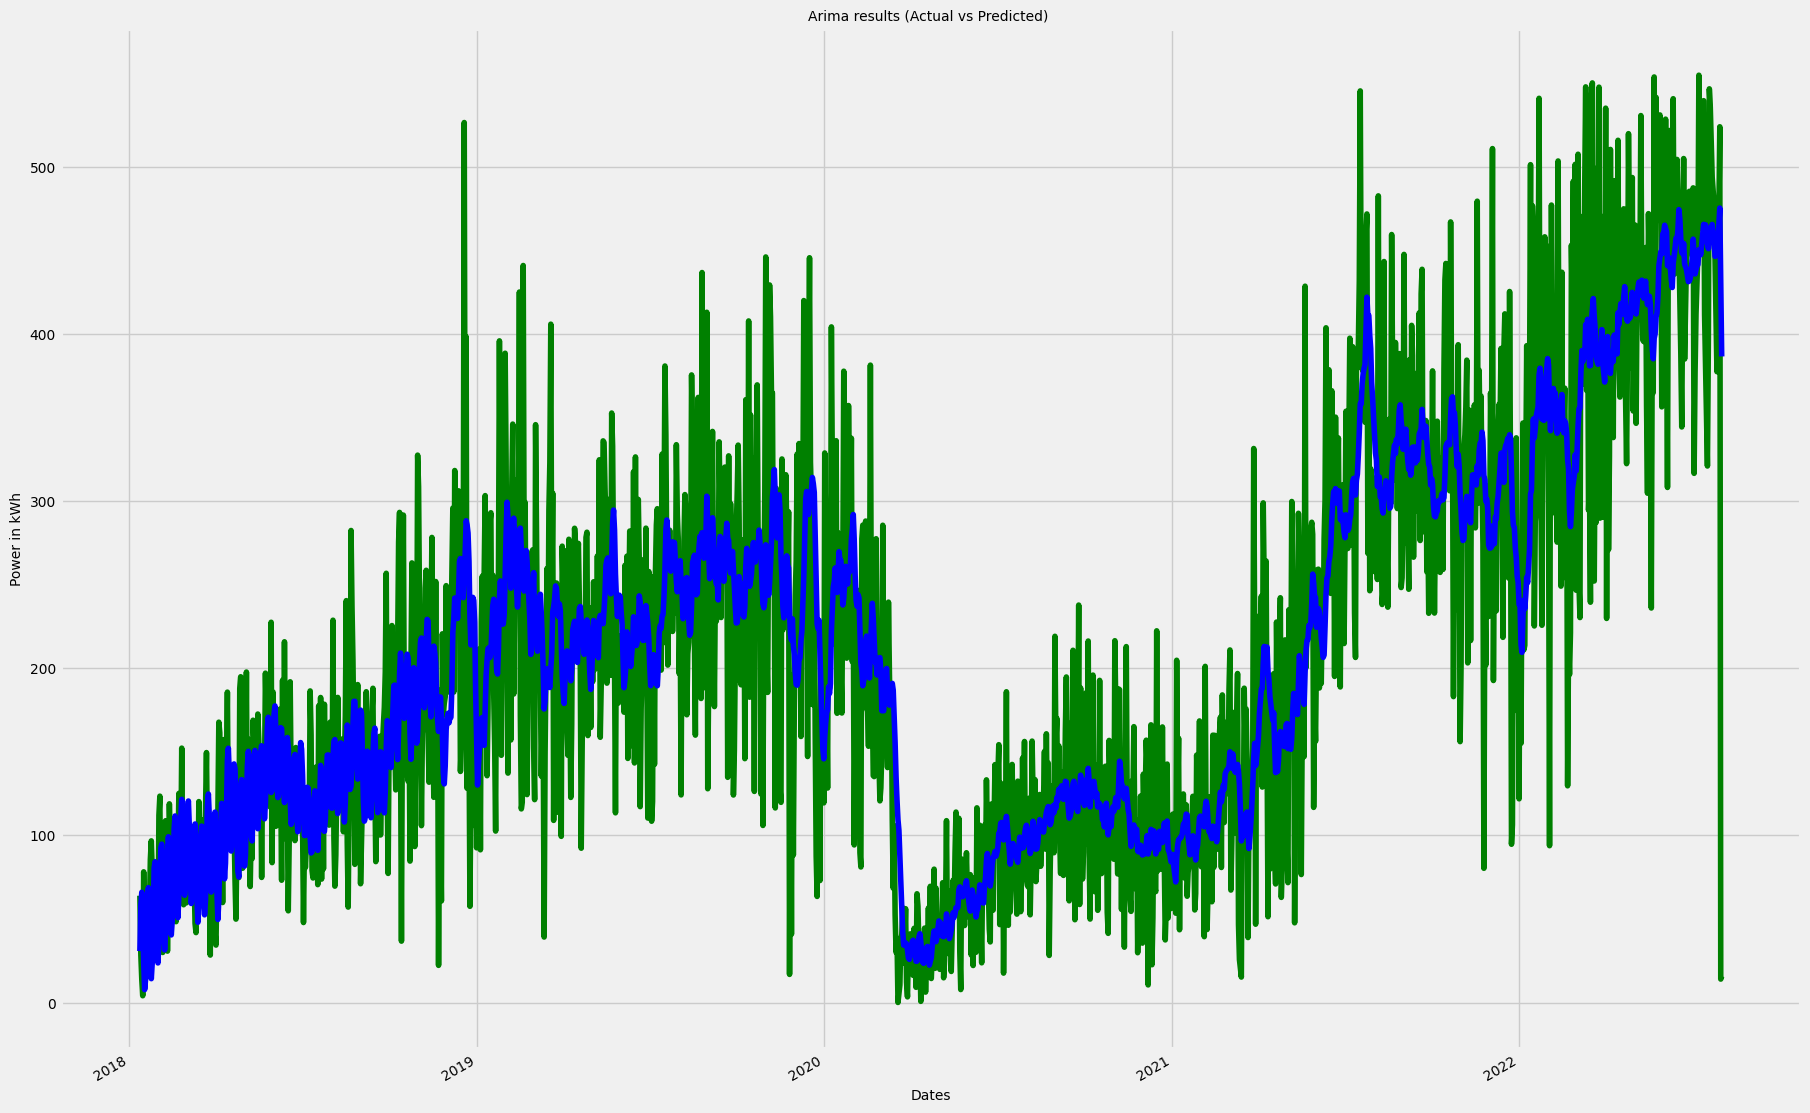

In [ ]:
result_arima.reset_index(level=0, inplace=True)
fig = plt.figure()
ax1= fig.add_subplot(111)

x = result_arima["Date"]
y = result_arima["Energy_kWh_x"]

y1 = result_arima["Predicted_orginal"]

plt.rcParams.update({'font.size': 5})
plt.plot(x,y, color="green")
plt.plot(x,y1, color="Blue")
plt.gcf().autofmt_xdate()
plt.xlabel('Dates',fontsize=10)
plt.ylabel("Power in kWh",fontsize=10)
plt.title("Arima results (Actual vs Predicted) ",fontsize=10)

END OF ARIMA
_________________________________________

**LSTM** (Long Short Term Memory Networks)

In [ ]:
data_Daily.reset_index(level=0, inplace=True)

In [ ]:
dataset = data_Daily
dataset["Month"] = pd.to_datetime(data_Daily["Date"]).dt.month
dataset["Year"] = pd.to_datetime(data_Daily["Date"]).dt.year
dataset["Date"] = pd.to_datetime(data_Daily["Date"]).dt.date
dataset["Time"] = pd.to_datetime(data_Daily["Date"]).dt.time
dataset["Week"] = pd.to_datetime(data_Daily["Date"]).dt.week
dataset["Day"] = pd.to_datetime(data_Daily["Date"]).dt.day_name()
dataset = data_Daily.set_index("Date")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

,index,Energy_kWh,Month,Year,Time,Week,Day
Date,,,,,,,
2018-01-01,0,6.504,1,2018,00:00:00,1,Monday


In [ ]:
TestData = dataset.tail(199)

Training_Set = dataset.iloc[:,0:1]

Training_Set = Training_Set[:-199]

In [ ]:
Training_Set = Training_Set
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [ ]:
X_train = []
Y_train = []
 
for i in range(1, Train.shape[0]):
    X_train.append(Train[i-1:i])
    Y_train.append(Train[i])

# Convert into Numpy Array
X_train = np.array(X_train)
Y_train = np.array(Y_train)
print(X_train.shape)
print(Y_train.shape)

(1475, 1, 1)
(1475, 1)


In [ ]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_train = np.reshape(X_train, newshape=(X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1475, 1, 1)

In [ ]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [ ]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
regressor.fit(X_train, Y_train, epochs = 5, batch_size = 1)

Epoch 1/5
1475/1475 [==============================] - 19s 7ms/step - loss: 0.0225
Epoch 2/5
1475/1475 [==============================] - 10s 6ms/step - loss: 0.0038
Epoch 3/5
1475/1475 [==============================] - 11s 7ms/step - loss: 0.0030
Epoch 4/5
1475/1475 [==============================] - 11s 7ms/step - loss: 0.0028
Epoch 5/5
1475/1475 [==============================] - 9s 6ms/step - loss: 0.0026


In [ ]:
Df_Total = pd.concat((dataset[["Energy_kWh"]], TestData[["Energy_kWh"]]), axis=0)

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData):].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(1, 200):
    X_test.append(inputs[i-1:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_Load = regressor.predict(X_test)

# Do inverse Transformation to get Values 
predicted_Load = sc.inverse_transform(predicted_Load)

7/7 [==============================] - 0s 6ms/step


In [ ]:
True_kiloWatthour = TestData["Energy_kWh"]
Predicted_kilowatthour  = predicted_Load
dates = TestData.index

In [ ]:
Predicted_data = pd.DataFrame(data={
    "Date":dates,
    "Truekilowatthour": True_kiloWatthour,
    "Predictedkilowatthour":[x[0] for x in Predicted_kilowatthour ]
})

In [ ]:
Truekilowatthour=Predicted_data["Truekilowatthour"]
Predictedkilowatthour=Predicted_data["Predictedkilowatthour"]

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Truekilowatthour, Predictedkilowatthour))
print('Mean Absolute Percentage Error:',metrics.mean_absolute_percentage_error(Truekilowatthour, Predictedkilowatthour))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Truekilowatthour, Predictedkilowatthour)))

Mean Absolute Error: 7.651545792009364
Mean Absolute Percentage Error: 0.05073979375057111
Root Mean Squared Error: 9.195469456327542


In [ ]:
True_kiloWatthour = TestData["Energy_kWh"]
Predicted_kilowatthour  = [x[0] for x in Predicted_kilowatthour ]
dates = TestData.index

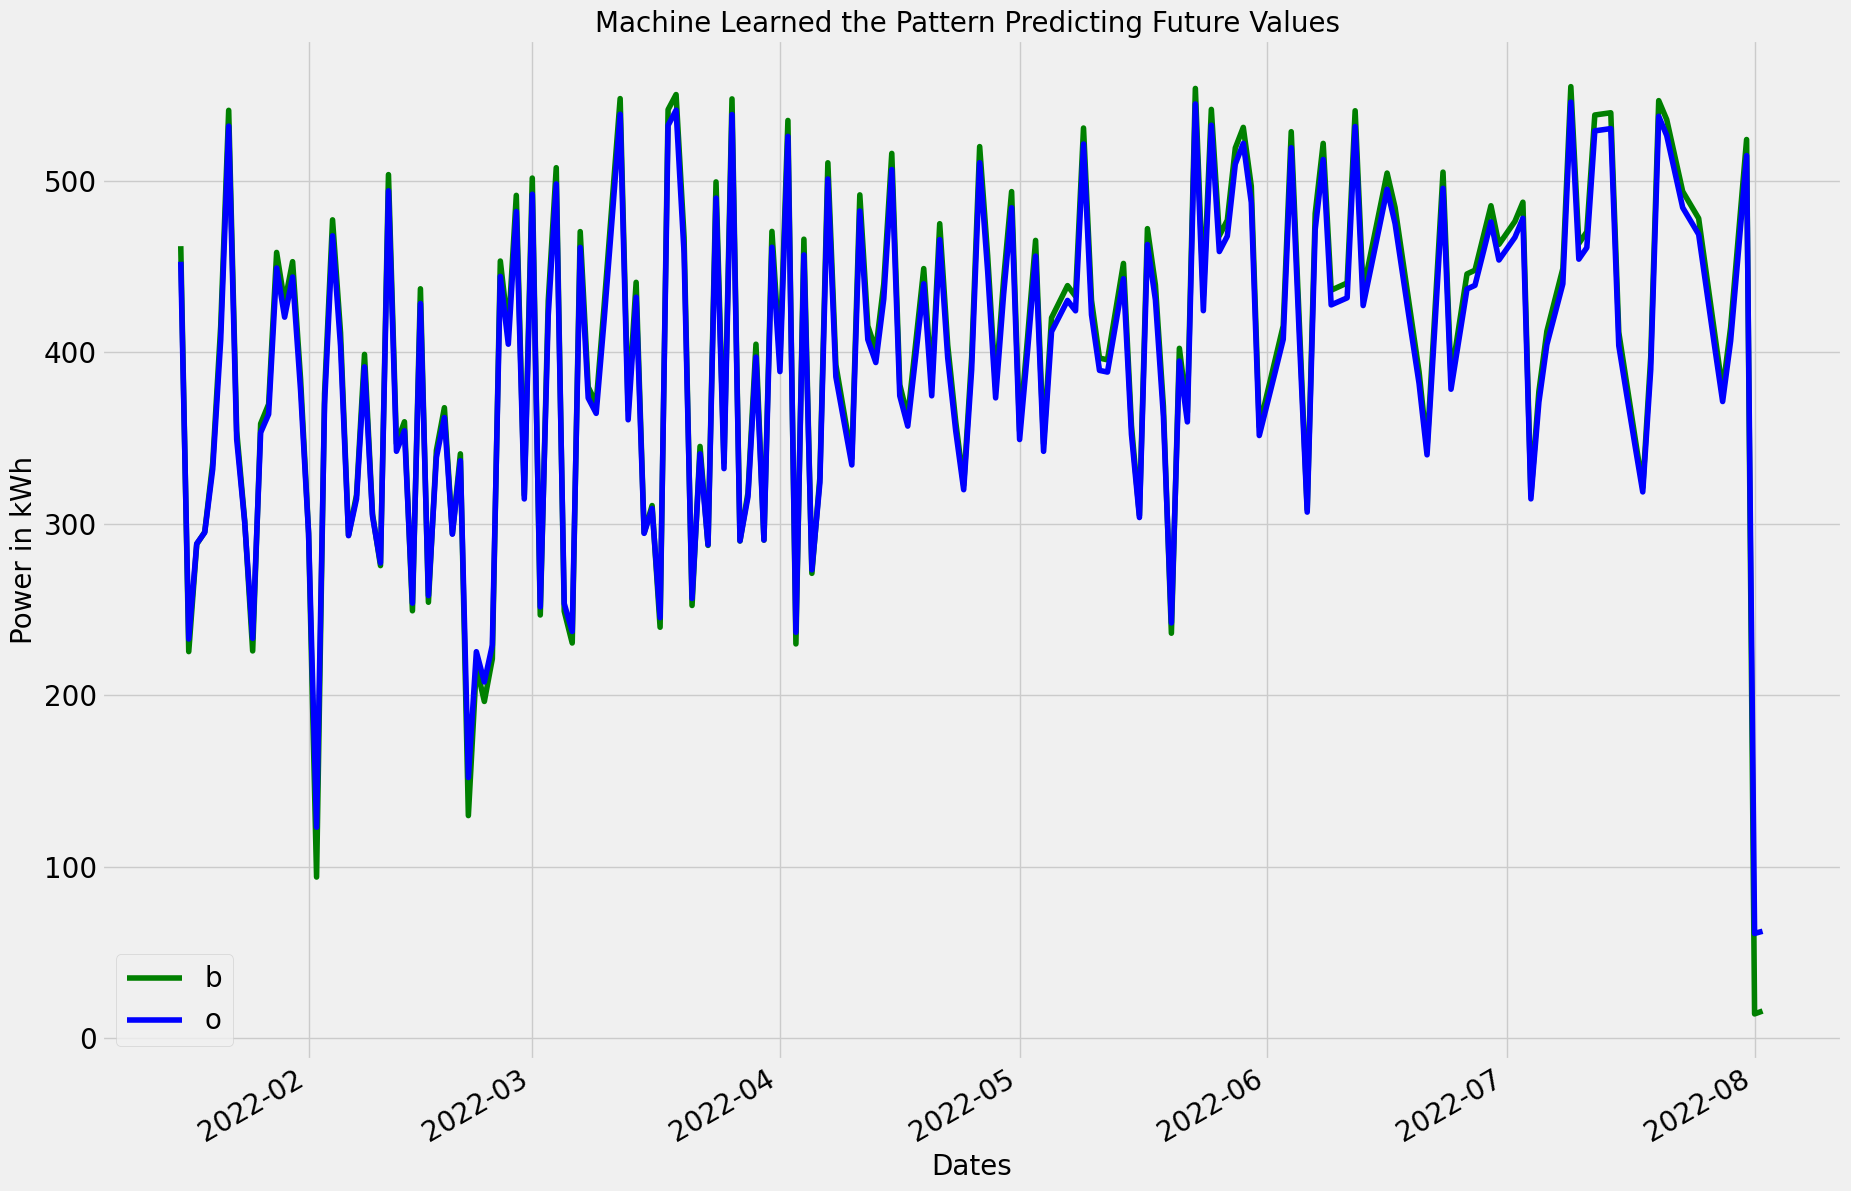

In [ ]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_kiloWatthour

y1 = Predicted_kilowatthour


plt.rcParams.update({'font.size': 20})
plt.plot(x,y, color="green")
plt.plot(x,y1, color="Blue")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates',fontsize=20)
plt.ylabel("Power in kWh",fontsize=20)
plt.title("Machine Learned the Pattern Predicting Future Values ",fontsize=20)

XG Boost

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [ ]:
#divide into train and validation set
train = dataset[:int(0.7*(len(dataset)))]
test = dataset[int(0.7*(len(dataset))):]

In [ ]:
# Creates time series features from datetime index
def create_features(dataset, label=None):
    dataset['date'] = dataset.index
    dataset['hour'] = dataset['date'].dt.hour
    dataset['dayofweek'] = dataset['date'].dt.dayofweek
    dataset['quarter'] = dataset['date'].dt.quarter
    dataset['month'] = dataset['date'].dt.month
    dataset['year'] = dataset['date'].dt.year
    dataset['dayofyear'] = dataset['date'].dt.dayofyear
    dataset['dayofmonth'] = dataset['date'].dt.day
    dataset['weekofyear'] = dataset['date'].dt.weekofyear
    
    X = dataset[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = dataset[label]
        return X, y
    return X

In [ ]:
X_train, y_train = create_features(train, label='Energy_kWh')
X_test, y_test = create_features(test, label='Energy_kWh')

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
test['KWh_Prediction'] = reg.predict(X_test)
Day_all = pd.concat([test, train], sort=False)

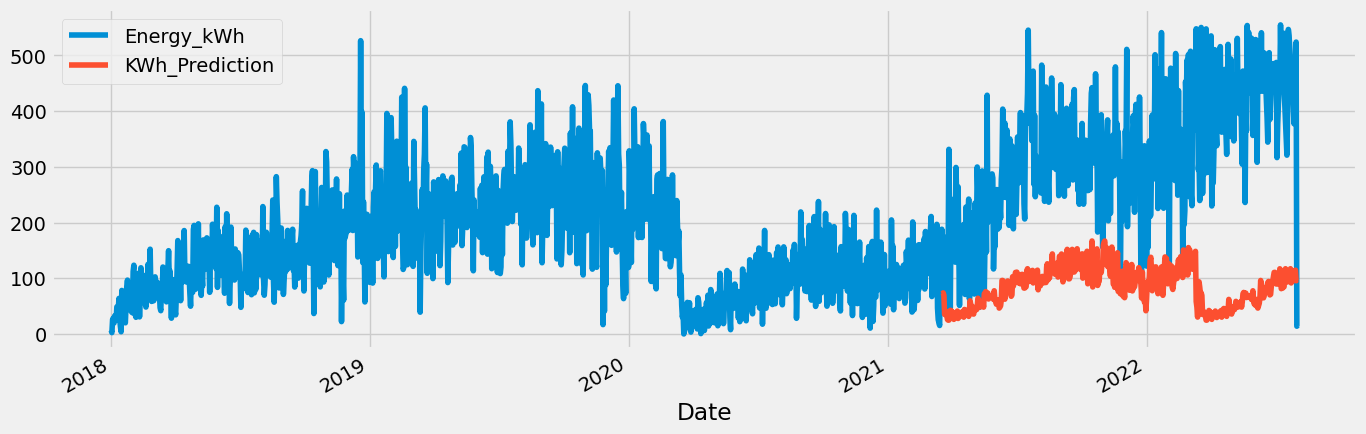

In [ ]:
_ = Day_all[['Energy_kWh','KWh_Prediction']].plot(figsize=(15, 5))

In [ ]:
y_true=test['Energy_kWh']
y_pred=test['KWh_Prediction']

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Absolute Percentage Error:',metrics.mean_absolute_percentage_error(y_true, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

Mean Absolute Error: 242.04840006909836
Mean Absolute Percentage Error: 0.7239503354722604
Root Mean Squared Error: 266.4758751468448
